In [9]:
%%time
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

print( "CPU average threshold" )

img_names = []
img_names.append( 'https://images.pexels.com/photos/842711/pexels-photo-842711.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940' )
img_names.append( 'http://3.bp.blogspot.com/-eilZTdgbWPA/XFUltCS4Z1I/AAAAAAAABz0/feDxTa3Emtsb3Wx4xxu0hWnFrohqtwQfwCKgBGAs/w0/mountain-lake-scenery-nature-cottage-25-4K.jpg' )
img_names.append ( 'http://images.pexels.com/photos/1379636/pexels-photo-1379636.jpeg?cs=srgb&dl=pexels-irina-iriser-1379636.jpg&fm=jpg' )
img_names.append( 'http://images.pexels.com/photos/853199/pexels-photo-853199.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940' )

# file download from a url
f_names = []
for i, img_name in enumerate( img_names ) :
    import urllib.request

    opener = urllib.request.build_opener()
    opener.addheaders = [('User-Agent', 'MyApp/1.0')]
    urllib.request.install_opener(opener)
    f_name = f"temp_{i:03d}.png"

    print( f"Saving ... [img_name] => [{f_name}]" )
    urllib.request.urlretrieve( img_name, f_name )

    f_names.append( f_name )
pass

row_cnt = len( img_names ); col_cnt = 3;
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=(6*col_cnt, 4*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt >= 2 else [ charts ]
idx = 0

print()

for i, f_name in enumerate( f_names ) :
    print( f"Thresholding {f_name}" )

    img = io.imread( f_name ) 

    img_color = img

    # 회색조 변환
    gray = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3 
    img = gray

    # 평균값 구하기 
    avg = np.average( img )

    # 평균값 임계치 적용  

    thresh = np.where( img < avg, 0 , 1 )

    chart = charts[idx]
    chart.imshow( img_color )
    chart.set_title( f'\nOriginal ({i+1:02d})\n' )
    idx += 1

    chart = charts[idx]
    chart.imshow( gray, cmap='gray' )
    chart.set_title( '\nGrayscale\n' )
    idx += 1

    chart = charts[idx]
    chart.imshow( thresh, cmap='gray' )
    chart.set_title( '\nThreshold\n' )
    idx += 1
pass

plt.tight_layout(); plt.show()

CPU average threshold
Saving ... [img_name] => [temp_000.png]
Saving ... [img_name] => [temp_001.png]
Saving ... [img_name] => [temp_002.png]
Saving ... [img_name] => [temp_003.png]
Thresholding temp_000.png
Thresholding temp_001.png
Thresholding temp_002.png
Thresholding temp_003.png


GPU average threshold


NameError: name 'f_names' is not defined

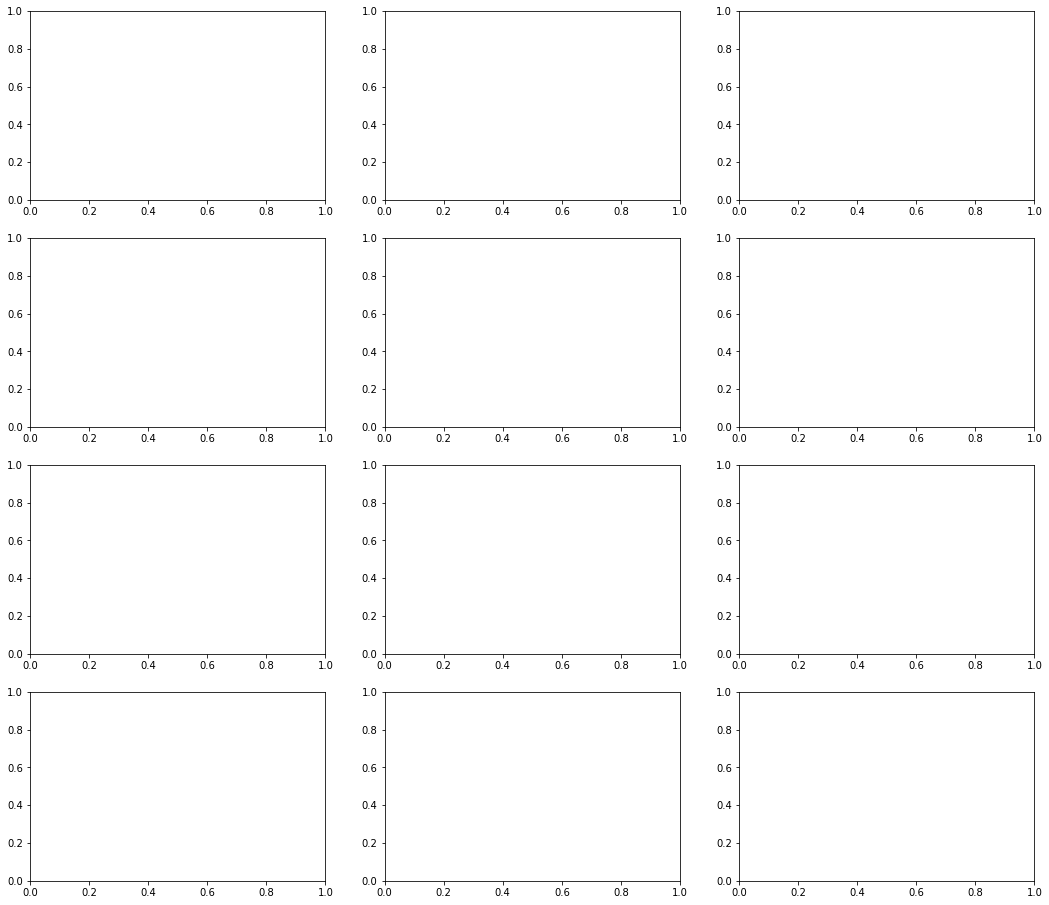

In [6]:
%%time
import cupy as np
import cupy
from matplotlib import pyplot as plt
from skimage import io

print( "GPU average threshold" )

img_names = []
img_names.append( 'https://images.pexels.com/photos/842711/pexels-photo-842711.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940' )
img_names.append( 'http://3.bp.blogspot.com/-eilZTdgbWPA/XFUltCS4Z1I/AAAAAAAABz0/feDxTa3Emtsb3Wx4xxu0hWnFrohqtwQfwCKgBGAs/w0/mountain-lake-scenery-nature-cottage-25-4K.jpg' )
img_names.append ( 'http://images.pexels.com/photos/1379636/pexels-photo-1379636.jpeg?cs=srgb&dl=pexels-irina-iriser-1379636.jpg&fm=jpg' )
img_names.append( 'http://images.pexels.com/photos/853199/pexels-photo-853199.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940' )

row_cnt = len( img_names ); col_cnt = 3;
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=(6*col_cnt, 4*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt >= 2 else [ charts ]
idx = 0

for i, f_name in enumerate( f_names ) :
    img = io.imread( f_name ) 

    img = cupy.array( img )

    img_color = img

    # 회색조 변환
    gray = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3 
    img = gray

    # 평균값 구하기 
    avg = np.average( img )

    # 평균값 임계치 적용  

    thresh = np.where( img < avg, 0 , 1 )

    chart = charts[idx]
    chart.imshow( cupy.asnumpy( img_color ) )
    chart.set_title( f'\nOriginal ({i+1:02d})\n' )
    idx += 1

    chart = charts[idx]
    chart.imshow( cupy.asnumpy( gray ), cmap='gray' )
    chart.set_title( '\nGrayscale\n' )
    idx += 1

    chart = charts[idx]
    chart.imshow( cupy.asnumpy( thresh ), cmap='gray' )
    chart.set_title( '\nThreshold\n' )
    idx += 1
pass

plt.tight_layout(); plt.show()